In [ ]:
from google.colab import files
_ = files.upload()

**1. Вивести зміст перших 5 рядків з файлу telecom_churn.csv.**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('telecom_churn.csv', sep=',')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**2. Вивести розмір даних (кількість рядків і стовбців), назву ознак та їх типи. Чи є пропуски даний у таблиці?**

In [ ]:
df.shape

(3333, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Бачимо, що кожному стовбчику відповідає 3333 непорожніх значень, рівно стільки, скільки є рядків у таблиці. А отже, пропусків у таблиці немає. Перевіримо також програмно.

In [ ]:
df.isnull().values.any()

False

**3. Змінити тип даних для стовпчика Churn на int64.**

In [ ]:
df['Churn'] = df.Churn.astype('int64', errors='ignore')
print(df.Churn.dtype)

int64


**4. Виконати сортування по Account length за спаданням.**

In [ ]:
df.sort_values(by='Account length', ascending=False)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
817,UT,243,510,No,No,0,95.5,92,16.24,163.7,63,13.91,264.2,118,11.89,6.6,6,1.78,2,0
1408,NM,232,408,No,No,0,165.6,104,28.15,195.9,115,16.65,118.3,77,5.32,11.8,3,3.19,1,0
1751,WY,225,415,No,No,0,182.7,142,31.06,246.5,63,20.95,218.0,103,9.81,8.8,2,2.38,1,0
1551,MI,225,415,No,No,0,165.4,106,28.12,273.7,109,23.26,210.0,93,9.45,8.7,3,2.35,0,1
1886,ID,224,510,No,No,0,111.4,133,18.94,175.0,66,14.88,217.2,106,9.77,5.5,6,1.49,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838,IA,1,408,No,Yes,26,208.0,115,35.36,185.0,113,15.73,177.7,144,8.00,8.1,9,2.19,1,0
2879,SC,1,415,No,Yes,26,146.6,68,24.92,172.8,67,14.69,173.8,113,7.82,10.0,2,2.70,1,0
923,MS,1,415,No,No,0,144.8,107,24.62,112.5,66,9.56,218.7,79,9.84,13.8,3,3.73,1,0
1409,NJ,1,415,No,Yes,30,183.1,95,31.13,232.6,110,19.77,248.3,110,11.17,8.4,2,2.27,0,0


**5. Надати відповідь на питання: яка максимальна довжина міжнародних дзвінків серед лояльних користувачів (Churn == 0), що не користуються послугою міжнародного роумінгу ('International plan' == 'No')?**

In [ ]:
df[(df['Churn'] == 0) & (df['International plan'] == 'No')]['Total intl minutes'].max()

18.9

**6. Порахувати загальну кількість дзвінків (Total day charge, Total eve charge, Total night charge) для всіх користувачів. Результат занести у новий стовпчик Total charge.**

In [ ]:
new_column = []
for index, row in df.iterrows():
    new_column.append(row['Total day charge'] + row['Total eve charge'] + 
                      row['Total night charge'])
df['Total charge'] = new_column
df[['Total day charge', 'Total eve charge', 'Total night charge', 
   'Total charge']].head()

,Total day charge,Total eve charge,Total night charge,Total charge
0,45.07,16.78,11.01,72.86
1,27.47,16.62,11.45,55.54
2,41.38,10.30,7.32,59.00
3,50.90,5.26,8.86,65.02
4,28.34,12.61,8.41,49.36


**7. Зробити графічну інтерпретацію попереднього пункту для 10 користувачів за максимальними показниками, що формують Total charge. Значення Total day charge, Total eve charge, Total night charge, Total charge повинні відображатися графічно.**

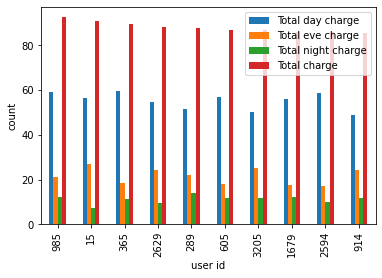

In [ ]:
g = df[['Total day charge', 'Total eve charge', 'Total night charge', 
   'Total charge']].sort_values(by='Total charge', ascending=False)\
   .head(10).plot.bar()
named = g.set(xlabel='user id', ylabel='count')

**8. Побудувати і вивести графічну інтерпретацію багатошарової моделі персептрона для бінарної класифікації. Модель повинна мати 8 входів, 4 прихованих шарів з 15, 10 15 та 20 нейронами і вихідний шар з 1 виходом. Функції лінійної активації використовуються в кожному прихованому шарі, а функція активації сигмоїда використовується в вихідному шарі для двійковій класифікації.**

In [ ]:
import keras
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense

In [ ]:
visible = Input(shape=(8,))
hidden1 = Dense(15, activation='linear')(visible)
hidden2 = Dense(10, activation='linear')(hidden1)
hidden3 = Dense(15, activation='linear')(hidden2)
hidden4 = Dense(20, activation='linear')(hidden3)
output = Dense(1, activation='sigmoid')(hidden4)
model = Model(inputs=visible, outputs=output)

In [ ]:
print(model.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense_10 (Dense)             (None, 15)                135       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_12 (Dense)             (None, 15)                165       
_________________________________________________________________
dense_13 (Dense)             (None, 20)                320       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 21        
Total params: 801
Trainable params: 801
Non-trainable params: 0
_____________________________________________________________

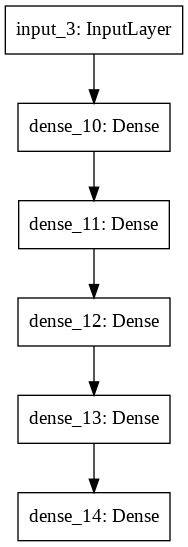

In [ ]:
plot_model(model, to_file='multilayer_perceptron_graph.png')